In [2]:
import pandas as pd;
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.formula.api import ols

In [21]:
a1_color = '#664c85'
a2_color = '#5b92b6'
a3_color = '#52d5bd'
a4_color = '#eeeeee'
a1_palette = 'mako'
a2_palette = 'mako_r'

## Price elasticity of demand
* A measure used in economics to show responsiveness (elasticity) of the quantity of goods or services against its change in price
* Assumption is that only the price changes
* Goal
  * Identify the percent change in demand to a 1% change in the price of the related good
* Specifically we want to answer the questions like:
  * If i lower the price of a product, how much more will i sell?
  * If the prices are raised, how will it affect the sales of other products?

### Initialization 

In [5]:
df_chickenprice = pd.read_csv(r'../../../data/csv/chickenprice.csv')
df_chickenprice

,Year,Quarter,Quantity,Price
0,1997,1,29.89688,170.60004
1,1997,2,29.39703,172.71996
2,1997,3,30.42702,175.80000
3,1997,4,29.56213,180.96000
4,1998,1,28.65733,192.00000
...,...,...,...,...
86,2018,3,22.76105,332.84004
87,2018,4,21.64175,335.43996
88,2019,1,21.68205,333.60000
89,2019,2,23.09255,341.72004


In [6]:
df_chickenprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      91 non-null     int64  
 1   Quarter   91 non-null     int64  
 2   Quantity  91 non-null     float64
 3   Price     91 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 3.0 KB


In [7]:
df_chickenprice.describe()

,Year,Quarter,Quantity,Price
count,91.000000,91.000000,91.000000,91.000000
mean,2007.879121,2.483516,23.924301,300.528352
std,6.604435,1.119153,2.357346,44.412277
min,1997.000000,1.000000,20.658950,170.600040
25%,2002.000000,1.500000,22.157135,277.600020
50%,2008.000000,2.000000,23.618140,300.120000
75%,2013.500000,3.000000,25.166245,336.860040
max,2019.000000,4.000000,30.427020,360.480000


In [10]:
df_chickenprice.isna().any()

Year        False
Quarter     False
Quantity    False
Price       False
dtype: bool

### Analysis

In [94]:
def get_covv_remarks(covariance):
    if covariance > 0:
        remarks = f'positive relationship'
        return remarks
    if covariance < 0:
        remarks = f'negative relationship'
        return remarks
    else:
        return 'not linearly related'

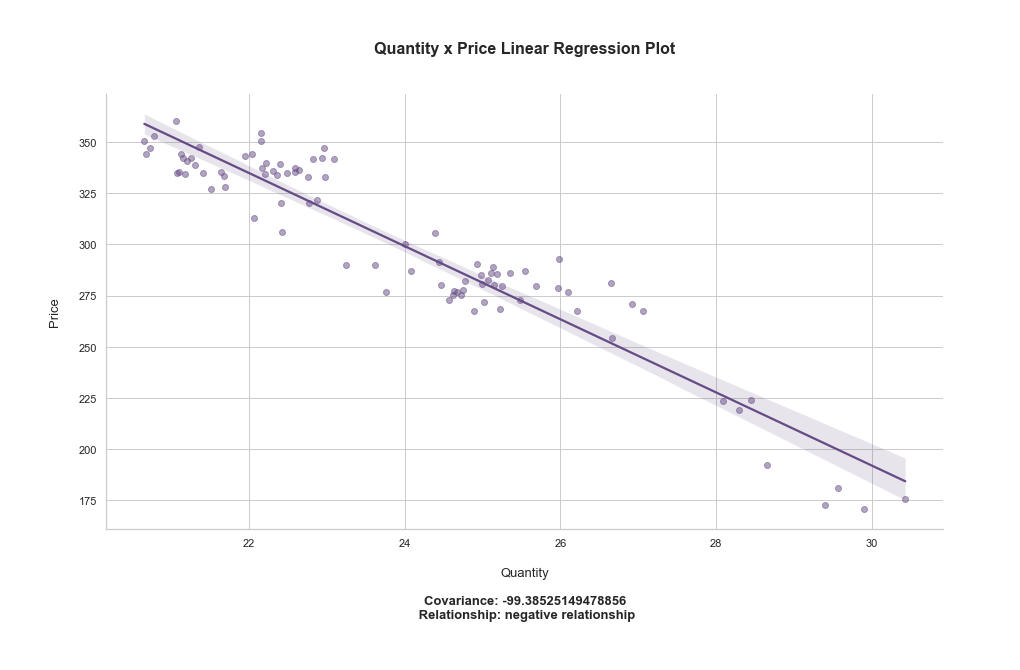

In [101]:
cov_quantity_price_df_chickenprice = df_chickenprice['Quantity'].cov(other=df_chickenprice['Price'])
cov_remarks_quantity_price_df_chickenprice = get_covv_remarks(cov_quantity_price_df_chickenprice)

sns.set(
    style = 'whitegrid',
    rc = {'figure.figsize' : (15,8)}
)

g = sns.regplot(
    data = df_chickenprice,
    y = 'Price',
    x = 'Quantity',
    color = a1_color,
    scatter_kws = dict(
        alpha = 0.5
    )
)

g.set_title(
    f"\n\n{g.get_xlabel()} x {g.get_ylabel()} Linear Regression Plot\n\n",
    fontdict = dict(
        fontsize = 16,
        fontweight = 'bold'
    )
)

g.set_xlabel(
    f"\n{g.get_xlabel()}\n",
    fontdict = dict(
        fontsize = 13,
        fontweight = 'medium'
    )
)

g.set_ylabel(
    f"\n\n\n{g.get_ylabel()}\n",
    fontdict = dict(
        fontsize = 13,
        fontweight = 'medium'
    )
)

plt.text(
    s = f'Covariance: {cov_quantity_price_df_chickenprice}\n Relationship: {cov_remarks_quantity_price_df_chickenprice}\n\n\n',
    transform = g.transAxes,
    x = 0.5,
    y = -0.23,
    verticalalignment = 'center',
    horizontalalignment = 'center',
    fontdict = dict(
        fontsize = 13,
        fontweight = 'bold'
    )
)

plt.text(
    s = ' ',
    transform = g.transAxes,
    x = 1.08,
    y = 1,
)


sns.despine()

In [106]:
model_df_chickenprice = ols("Quantity ~ Price", data = df_chickenprice).fit()
print(model_df_chickenprice.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.69e-46
Time:                        16:40:03   Log-Likelihood:                -101.37
No. Observations:                  91   AIC:                             206.7
Df Residuals:                      89   BIC:                             211.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.0669      0.537     72.701      0.0

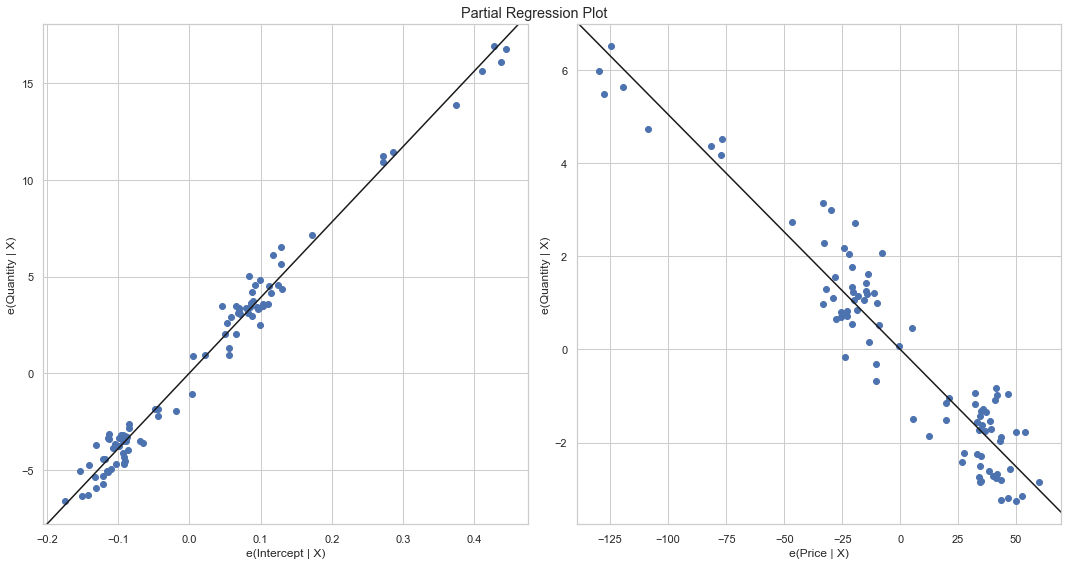

In [109]:
g = sm.graphics.plot_partregress_grid(model_df_chickenprice)

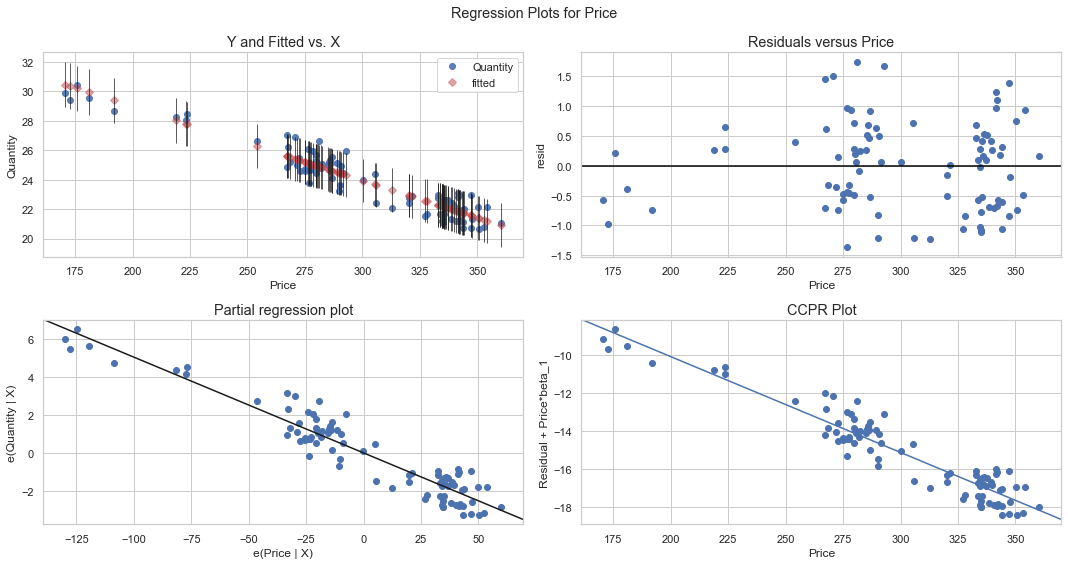

In [110]:
g = sm.graphics.plot_regress_exog(model_df_chickenprice, 'Price')